## AUTHOR: VAISHNAV KRISHNA P 
### TITLE: TELECOM CUSTOMER CHURN PREDICTION
* OBJECTIVE : The objective of customer churn prediction is to utilize historical data and predictive modeling techniques to identify and forecast customers who are likely to cease their relationship with a business. By doing so, businesses can proactively implement retention strategies to reduce churn and sustain customer loyalty, ultimately optimizing profitability.
#### DATASET LINK:https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction

In [1207]:
# importing necessory dependencies 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# changing the display settings
pd.set_option('display.max_columns',None)

# module for train test split 
from sklearn.model_selection import train_test_split 
# minmax scler 
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# modules for training the model
import tensorflow as tf 
from tensorflow import keras 

# ignoring the unnecessory warnings 
import warnings 
warnings.filterwarnings(action='ignore')

In [1208]:
#importing the dataset 
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv.xls")

In [1209]:
# first five records
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1210]:
# shape of the dataset 
df.shape

(7043, 21)

In [1211]:
# datatypes of the features 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [1212]:
# informations about the datset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1213]:
# checking for duplicated rows duplicates
df.duplicated().sum()

0

In [1214]:
# discription about the datset 
df.describe(include=None)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [1215]:
# No of columns 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

* Info:
    - Dataset contains 7043 rows and 21 columns 
    - There is no duplicate rows or columns present in the dataset 
    - Majority of the features appear to be categorical 
    - from the primary analysis there is no missing values. all the features are having some values 

### EDA
0. ABOUT THE DATASET FEATURES 
1. MISSING VALUE ANALYSIS 
2. CATEGORICAL FEATURE ANALYSIS 
3. NUMERICAL FEATURE ANALYSIS 
4. DATA VISUALISATION
5. CORELATION ANALYSIS 
6. GROUPBY ANALYSIS 
7. CHECK WHETHER THE DATASET IS BALANCED OR NOT

#### ABOUT THE DATASET FEATURES 

In [1216]:
# features in the dataframe 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

FEATURES :
* CUSTOMERID - unique identifier for the customer 
* gender - Gender of the customer 
* Seniorcitizer - wheter the citizen is a senior citizer or not 
* Partner - whether a customer has a partner or spouse
* Dependence - dependency 
* tenure - length of time a customer has been with a company
* PhoneService - whether a customer subscribes to a phone service offered by the company.
* Multiple lines - "Yes": Indicates that the customer subscribes to multiple lines of service."No": Indicates that the customer does not subscribe to multiple lines of service."No phone service": Indicates that the customer does not subscribe to any phone service at all.
* InternetService - "DSL" (Digital Subscriber Line): Indicates that the customer subscribes to DSL internet service."Fiber optic": Indicates that the customer subscribes to fiber optic internet service."No": Indicates that the customer does not subscribe to any internet service.
* OnlineBackup: 1."Yes": Indicates that the customer subscribes to the online backup service."No": Indicates that the customer does not subscribe to the online backup service.
* Device Protection : "Yes": Indicates that the customer subscribes to the device protection service."No": Indicates that the customer does not subscribe to the device protection service.
* TechSupport: "Yes": Indicates that the customer subscribes to technical support services."No": Indicates that the customer does not subscribe to technical support services.
* StreamingTV : In a dataset, "StreamingTV" have two categories:"Yes": Indicates that the customer subscribes to streaming television services."No": Indicates that the customer does not subscribe to streaming television service
* StreamingMovies: In a dataset, "StreamingMovies" have two categories:"Yes": Indicates that the customer subscribes to streaming movie services."No": Indicates that the customer does not subscribe to streaming movie services.
* Contract - "Month-to-month": Indicates that the customer has a month-to-month contract, which typically allows for greater flexibility but may have higher rates."One year": Indicates that the customer has a contract for one year, which often offers lower rates compared to month-to-month contracts."Two year": Indicates that the customer has a contract for two years, which usually provides the most favorable rates and terms.
* PaperlessBilling: "Yes": Indicates that the customer has opted for paperless billing."No": Indicates that the customer still receives paper-based bills.
* PaymentMethod : "Electronic check": Indicates that the customer pays electronically, often through online banking or direct debit."Credit card (automatic)": Indicates that the customer has set up automatic payments using a credit card."Bank transfer (automatic)": Indicates that the customer has set up automatic payments through bank transfers."Mailed check": Indicates that the customer pays by mailing a physical check.
* MonthlyCharges
* TotalCharges
* Churn - "Yes": Indicates that the customer has churned, i.e., terminated their subscription or discontinued their relationship with the company."No": Indicates that the customer has not churned and is still active.

#### CHECKING WHETHER THE DATASET IS BALANCE OR NOT 

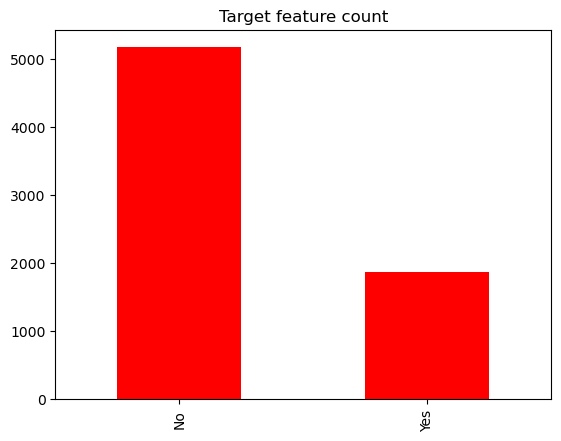

In [1217]:
# count plot for target feature 
df['Churn'].value_counts().plot(kind='bar',color='r',title='Target feature count')
plt.show()

In [1218]:
# value counts of the target features 
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Dataset is not balanced, we have to use some technique to make it balanced 

#### MISSING VALUE ANAYSIS 

In [1219]:
# no of missing values in each features
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1220]:
# No of missing values in each row 
df.isnull().sum(axis=1).sum()

0

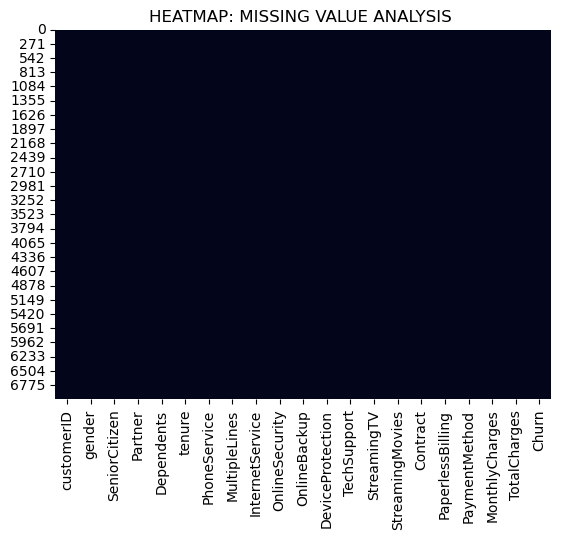

In [1221]:
# heat map analysis 
plt.title("HEATMAP: MISSING VALUE ANALYSIS ")
sns.heatmap(df.isnull(),cbar=False)
plt.show()

* There is no missing values in the dataframe.

#### CATEGORICAL FEATURE ANALYSIS

In [1222]:
# categorical features 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

* In this categorical features,customerID and TotalCharges cannot be a categorical feature.

In [1223]:
# removing the non necessory features 
non_categorical_features = ['customerID','TotalCharges']

categorical_features = [feature for feature in categorical_features if feature not in non_categorical_features]

In [1224]:
categorical_features,len(categorical_features)

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'],
 16)

In [1225]:
# splitting the dataset for better visualisation
customer_churn_data = df[df['Churn'] == 'Yes']
customer_non_churn_data = df[df['Churn'] == "No"].sample(n=len(customer_churn_data))

In [1226]:
# since the datset is balanced 
len(customer_churn_data),len(customer_non_churn_data)

(1869, 1869)

In [1227]:
customer_churn_data['gender'].value_counts()

Female    939
Male      930
Name: gender, dtype: int64

In [1228]:
customer_non_churn_data['gender'].value_counts()

Male      958
Female    911
Name: gender, dtype: int64

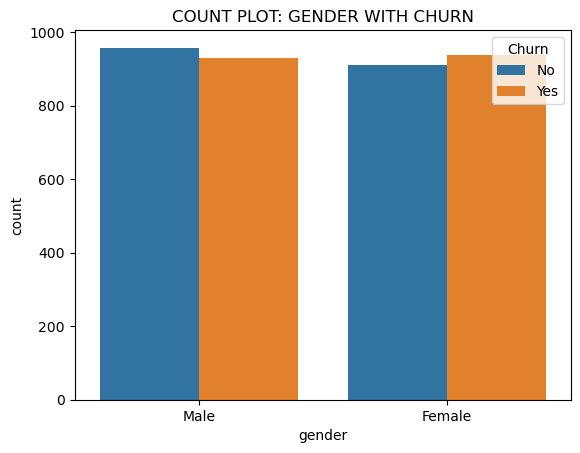

In [1229]:
# count plot 
plt.title("COUNT PLOT: GENDER WITH CHURN")
sns.countplot(data = pd.concat([customer_non_churn_data,customer_churn_data],axis=0),x='gender',hue='Churn')
plt.show()

* gender is not a very important feature for churn prediction

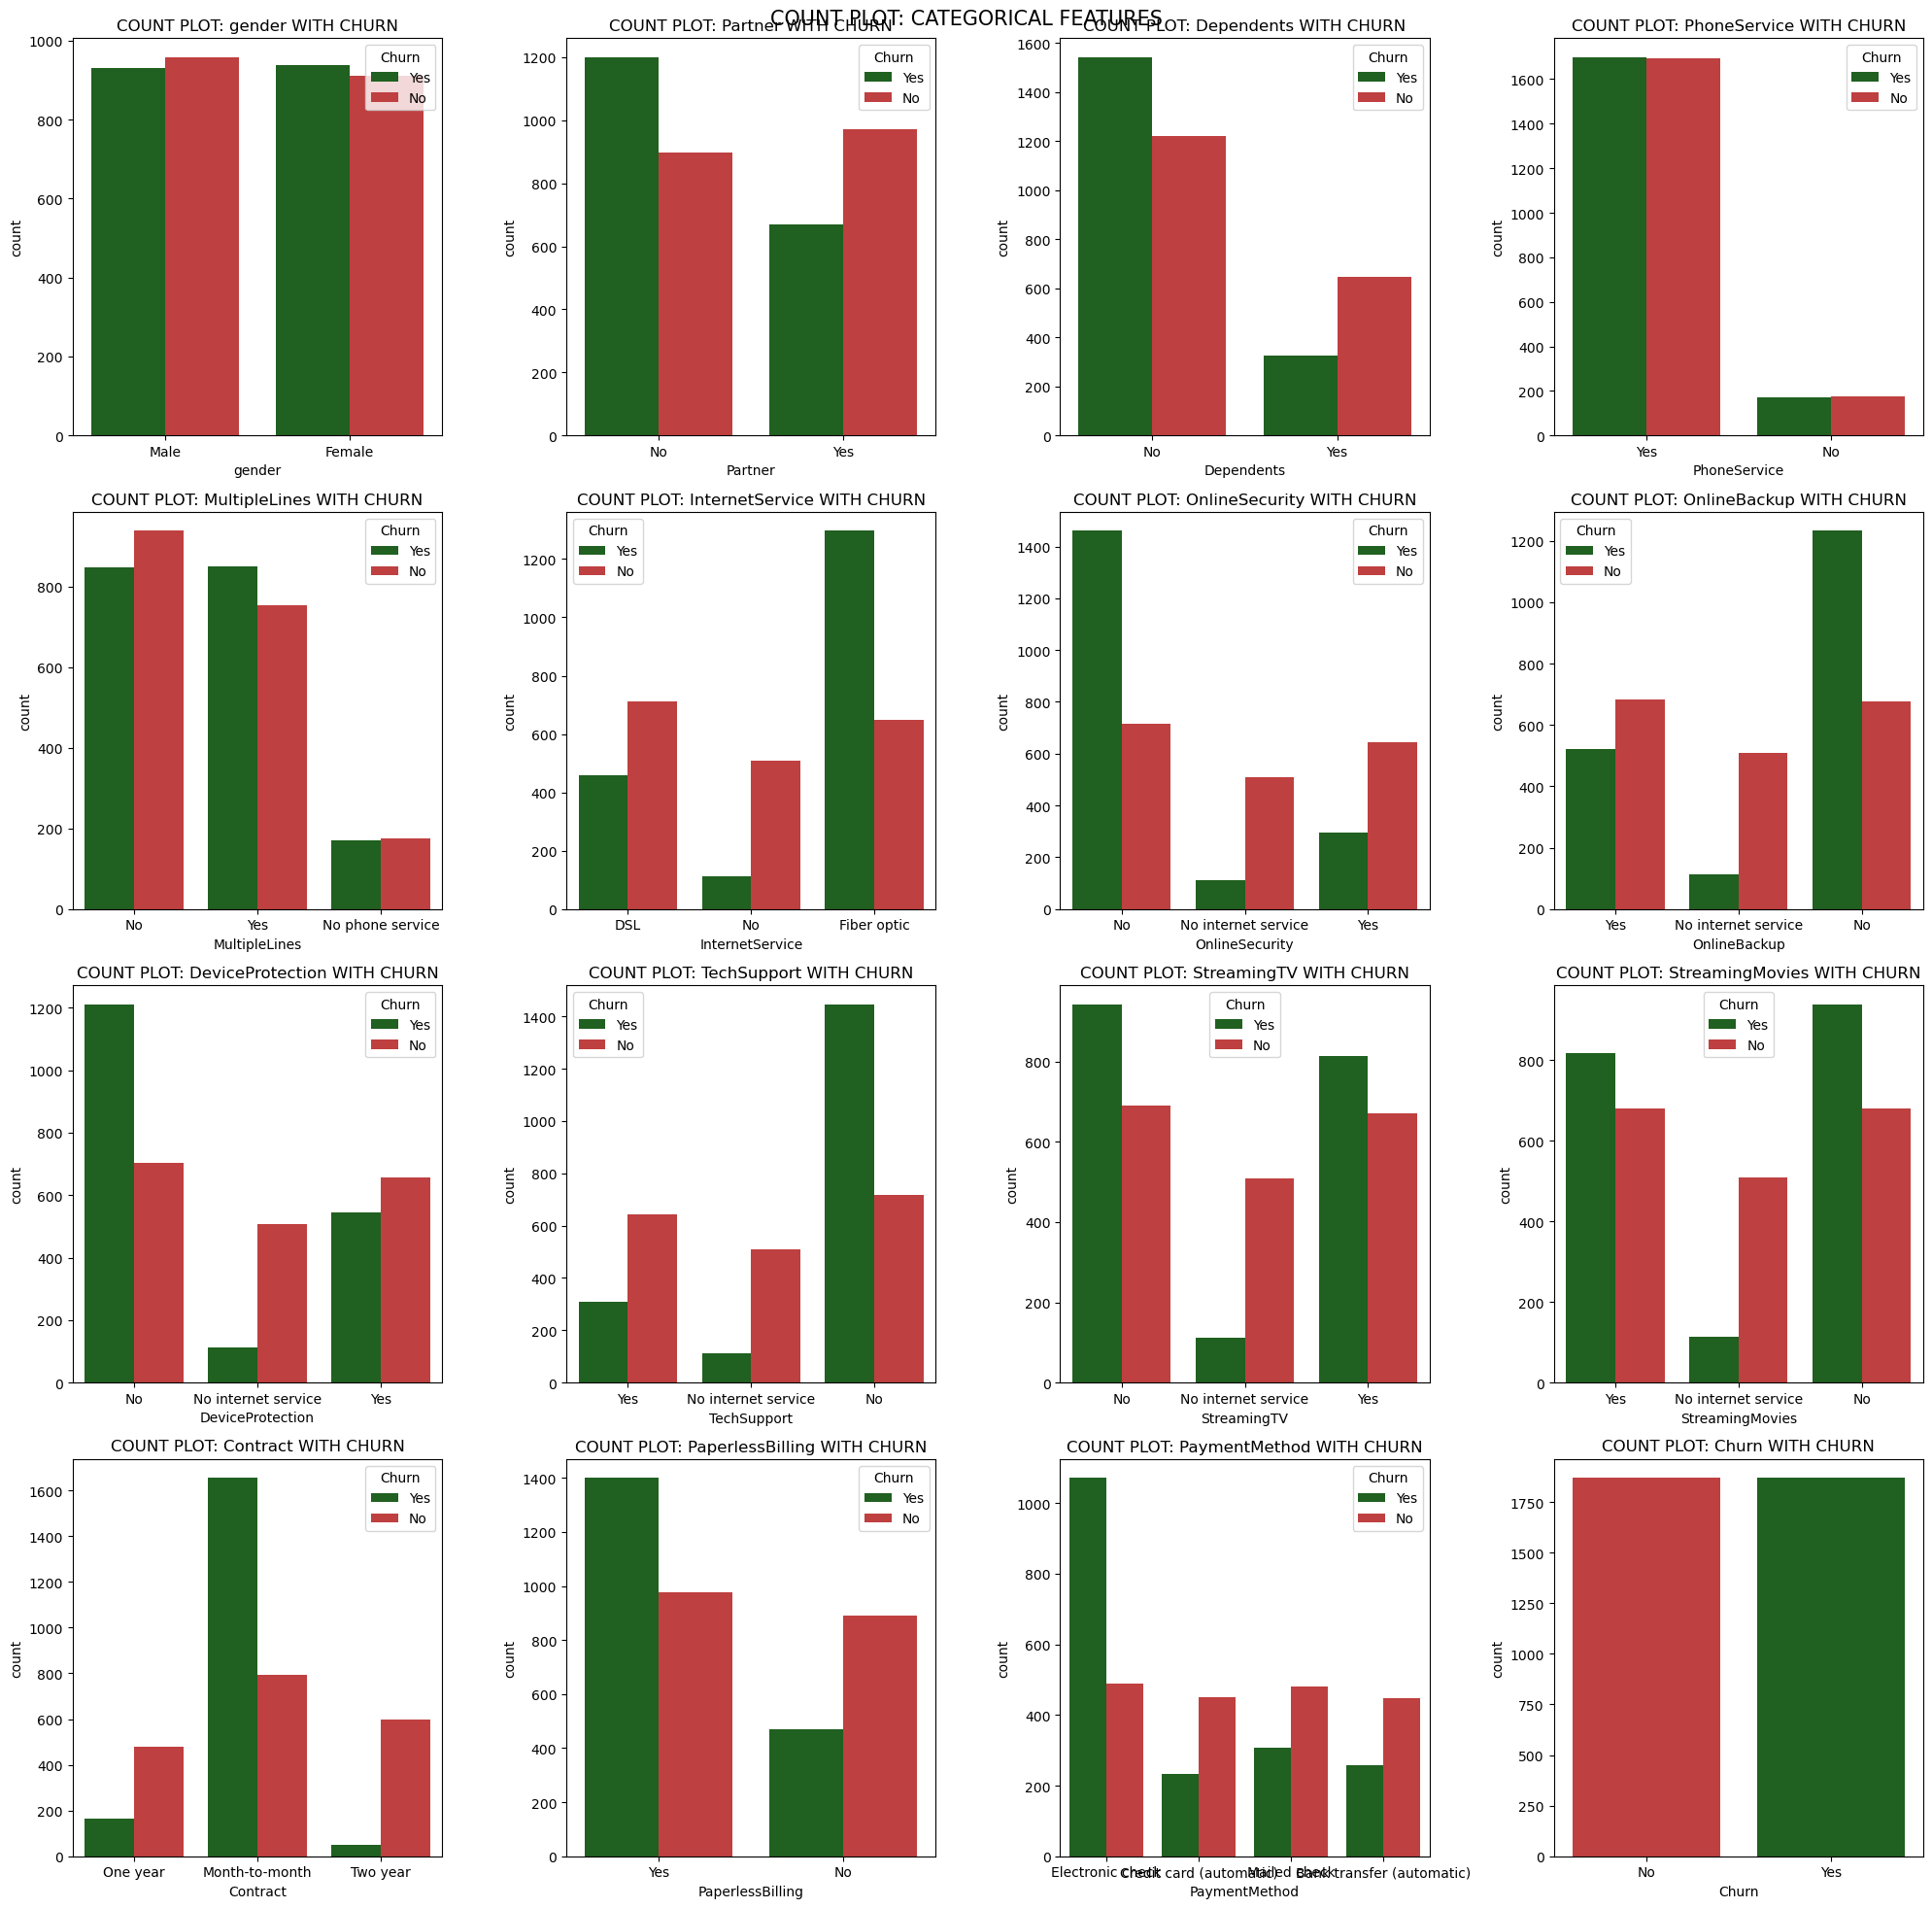

In [1230]:
# count plots
plt.figure(figsize=(20,20))
plt.suptitle("COUNT PLOT: CATEGORICAL FEATURES",fontsize=15)
c = 1
for feature in categorical_features:
    plt.subplot(4,4,c)
    c += 1
    plt.title("COUNT PLOT: {} WITH CHURN".format(feature))
    colors={"Yes":'g',"No":'r'}
    sns.countplot(data = pd.concat([customer_non_churn_data,customer_churn_data],axis=0),x=feature,
                  hue='Churn',palette=colors,saturation=0.5,hue_order=['Yes','No'])
plt.tight_layout()
plt.show()

* info:
    - features with high chance of churn : contract - month to month,paperlessbilling-yes,paymenthmethod-Electronic check,techsupport-no,device protection-no,online security- no,internet_service-fiberoptic

In [1231]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [1232]:
# code for taking the number of categries and categories of each categorica feature 
for feature in categorical_features:
    print(f"{feature}: categories: {df[feature].unique()}    :no of categories: {df[feature].nunique()}")

gender: categories: ['Female' 'Male']    :no of categories: 2
Partner: categories: ['Yes' 'No']    :no of categories: 2
Dependents: categories: ['No' 'Yes']    :no of categories: 2
PhoneService: categories: ['No' 'Yes']    :no of categories: 2
MultipleLines: categories: ['No phone service' 'No' 'Yes']    :no of categories: 3
InternetService: categories: ['DSL' 'Fiber optic' 'No']    :no of categories: 3
OnlineSecurity: categories: ['No' 'Yes' 'No internet service']    :no of categories: 3
OnlineBackup: categories: ['Yes' 'No' 'No internet service']    :no of categories: 3
DeviceProtection: categories: ['No' 'Yes' 'No internet service']    :no of categories: 3
TechSupport: categories: ['No' 'Yes' 'No internet service']    :no of categories: 3
StreamingTV: categories: ['No' 'Yes' 'No internet service']    :no of categories: 3
StreamingMovies: categories: ['No' 'Yes' 'No internet service']    :no of categories: 3
Contract: categories: ['Month-to-month' 'One year' 'Two year']    :no of cat

* There is no noises in the each features.

#### NUMERICAL FEATURE ANALYSIS 

In [1233]:
# extracting numerical features 
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features 

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [1234]:
numerical_features.append("TotalCharges")
numerical_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [1235]:
df[numerical_features]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.5
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.5
7039,0,72,103.20,7362.9
7040,0,11,29.60,346.45
7041,1,4,74.40,306.6


* Total charges in a Object type, have to convert to object type  

In [1236]:
sum(df['TotalCharges'] == " ")

11

In [1237]:
df[~(df['TotalCharges'] != " ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


* We can remove the recoreds with total charges is " " string 

In [1238]:
# removing the tuples with total charge is " " string 
df = df[df['TotalCharges'] != " "]

In [1239]:
# shape of new dataframe 
df.shape

(7032, 21)

In [1240]:
# changing the datatype to float 
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [1241]:
# datatypes of numerical features 
df[numerical_features].dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

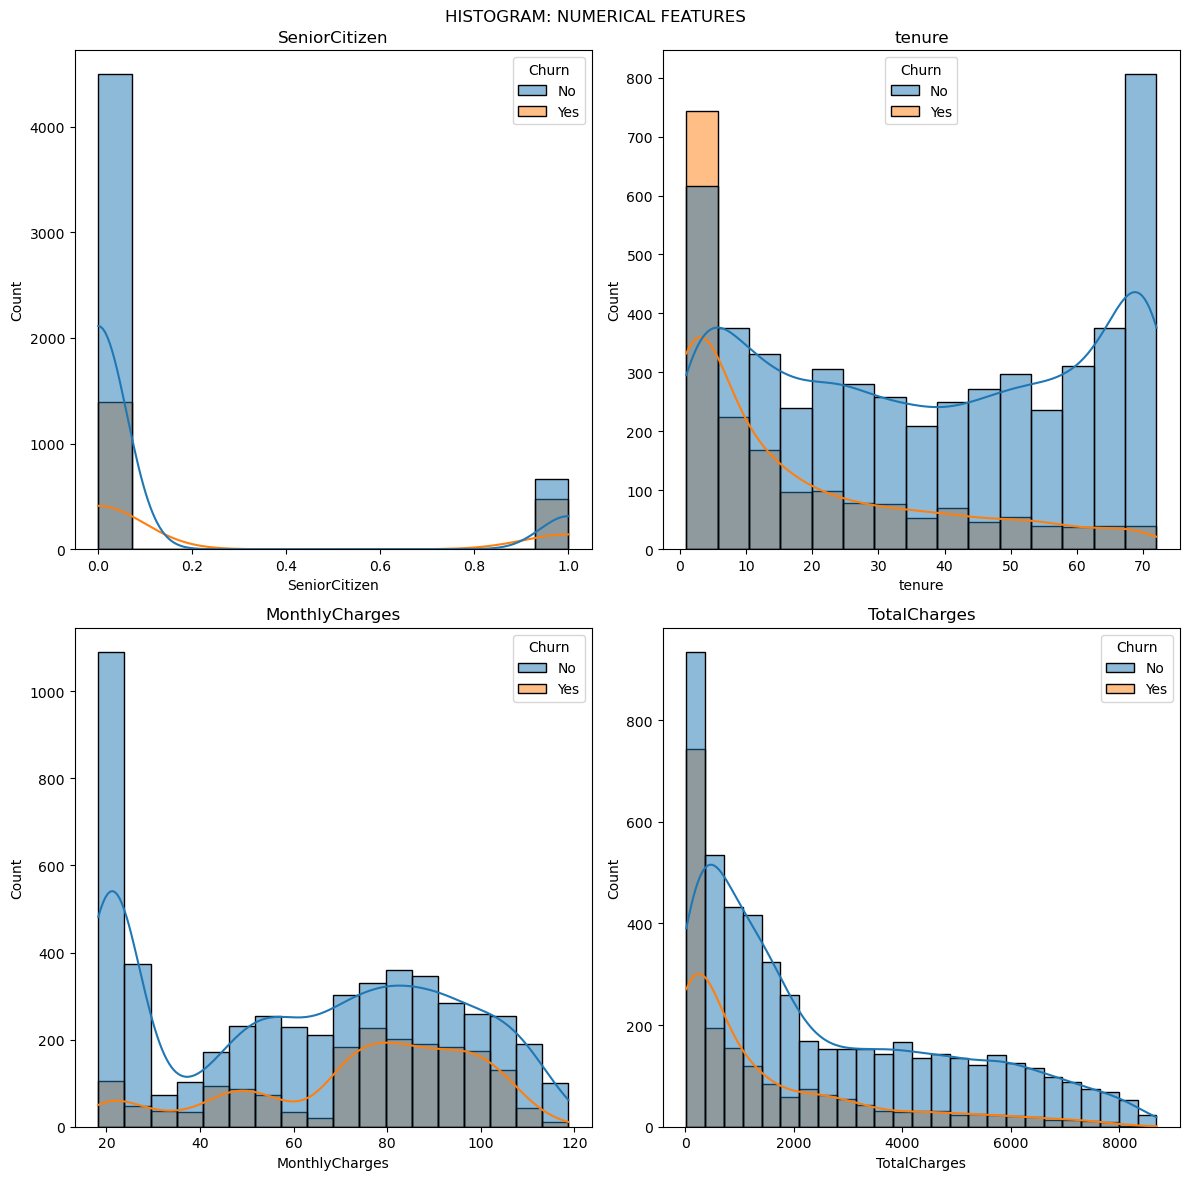

In [1242]:
# histogram of feach feature to understand the distribution of the each features
plt.figure(figsize=(12,12))
plt.suptitle("HISTOGRAM: NUMERICAL FEATURES")
c = 1
for feature in numerical_features:
    plt.subplot(2,2,c)
    c += 1
    plt.title("{}".format(feature))
    sns.histplot(data = df,x=feature,hue='Churn',kde=True)
plt.tight_layout()
plt.show()

In [1243]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

* Senior citizen is a categorical features with 0 represent not senior citizen and 1 represent senior citizen 

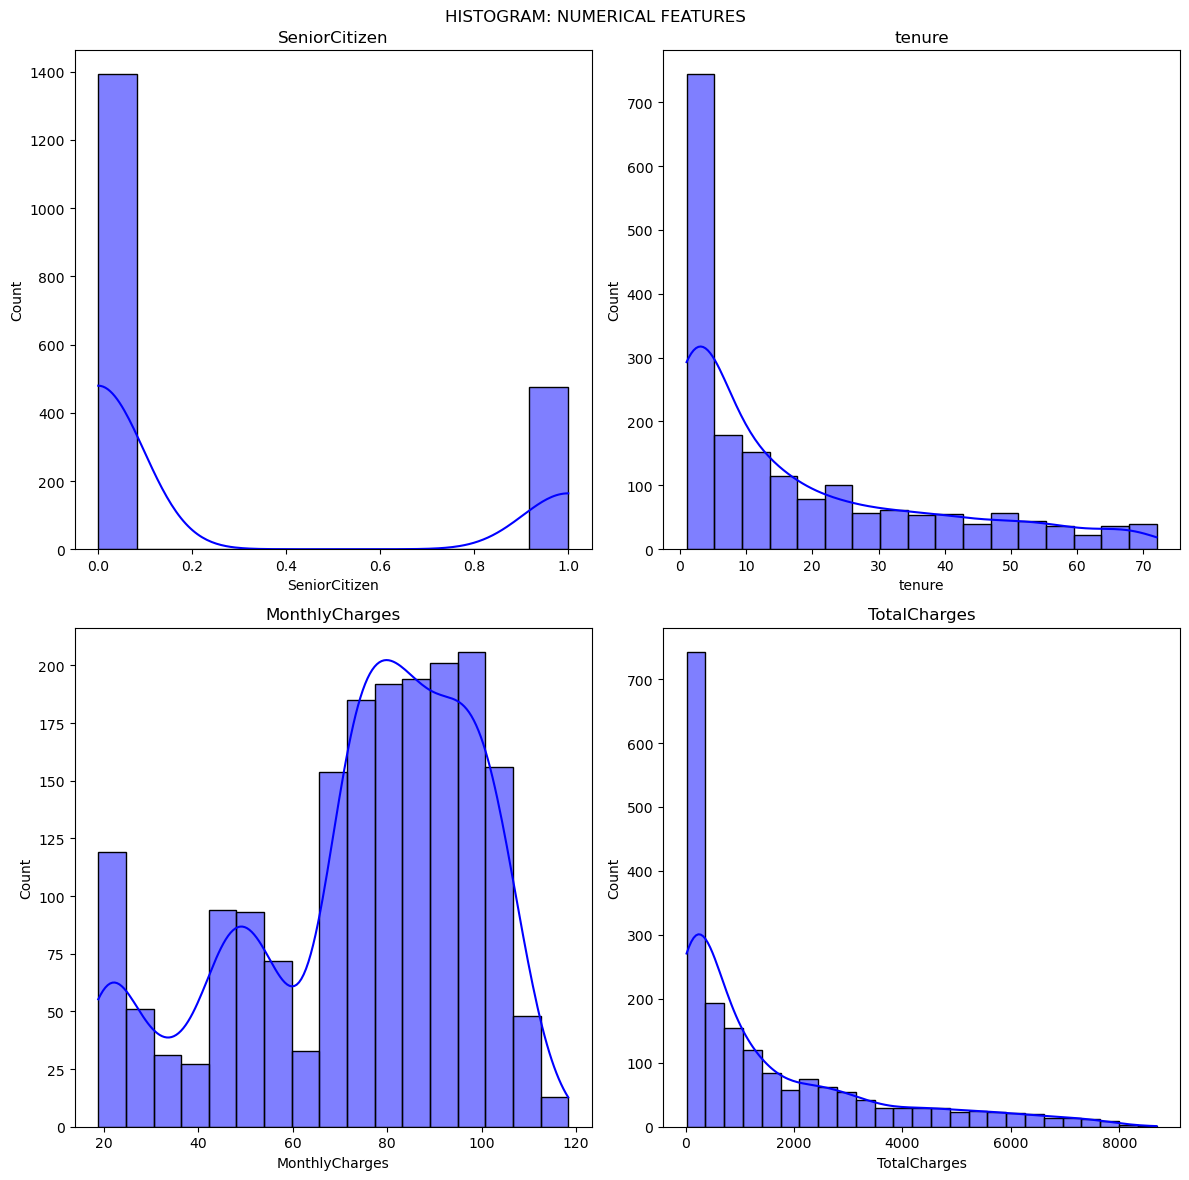

In [1244]:
# histogram of feach feature to understand the distribution of the each features
plt.figure(figsize=(12,12))
plt.suptitle("HISTOGRAM: NUMERICAL FEATURES")
c = 1
for feature in numerical_features:
    plt.subplot(2,2,c)
    c += 1
    plt.title("{}".format(feature))
    sns.histplot(data = df[df["Churn"] == "Yes"],x=feature,kde=True,color='b')
plt.tight_layout()
plt.show()

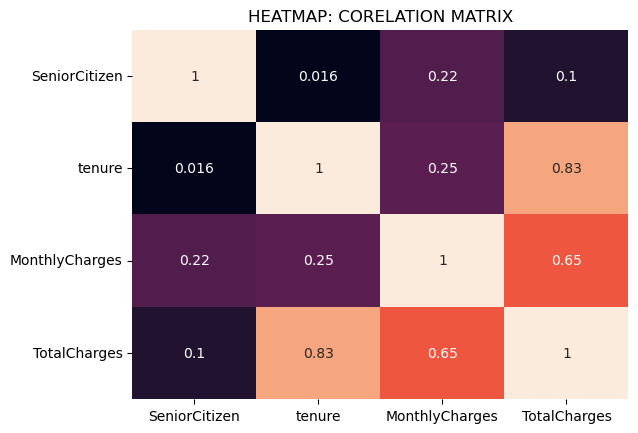

In [1245]:
# corelation matrix 
plt.title("HEATMAP: CORELATION MATRIX")
sns.heatmap(df[numerical_features].corr(),annot=True,cbar=False)
plt.show()

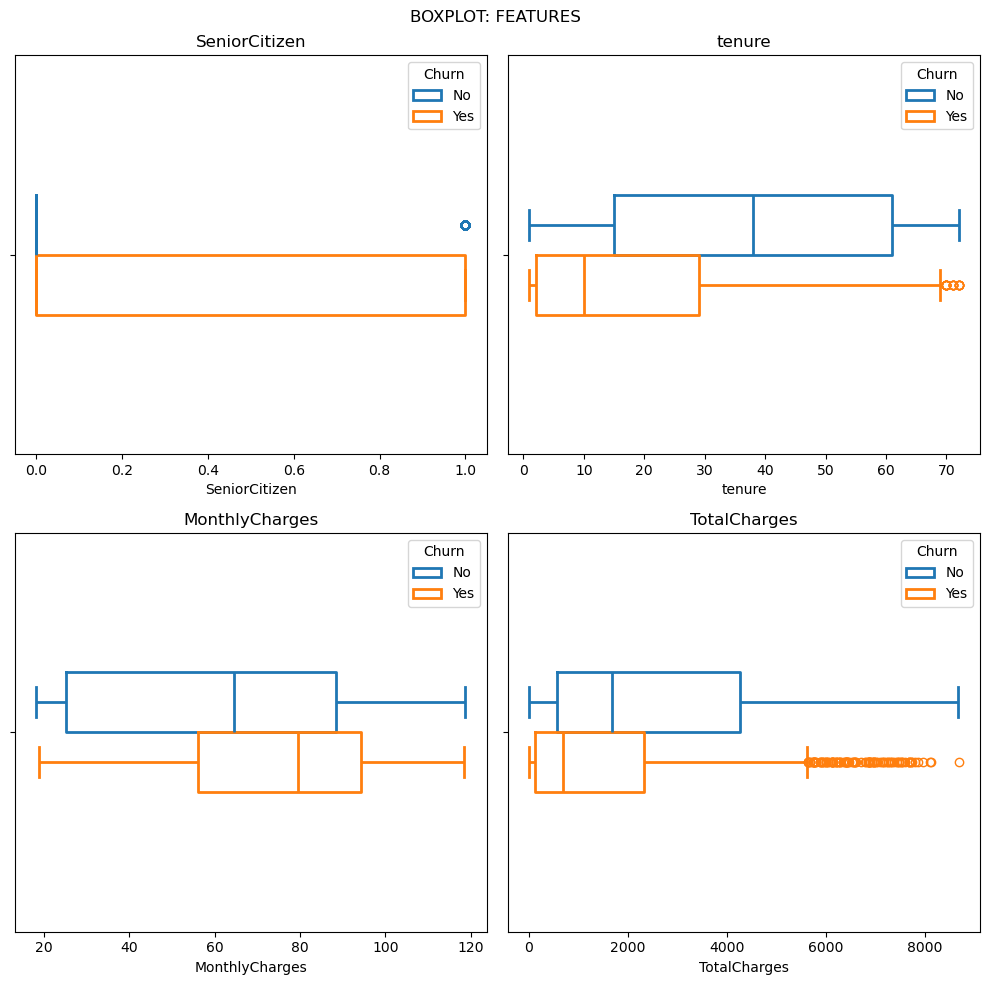

In [1246]:
# Boxplot of the numerical features
plt.figure(figsize=(10,10))
plt.suptitle("BOXPLOT: FEATURES")
c = 1
for feature in numerical_features:
    plt.subplot(2,2,c)
    plt.title(feature)
    c += 1
    sns.boxplot(data = df,x=feature,saturation=0.6,fill=False,width=0.3,
                linewidth=2,hue='Churn')
plt.tight_layout()
plt.show()

* info:
    - features which highly effect the prediction of Churn : Monthly charges, tenure(highly corelated with total charges)

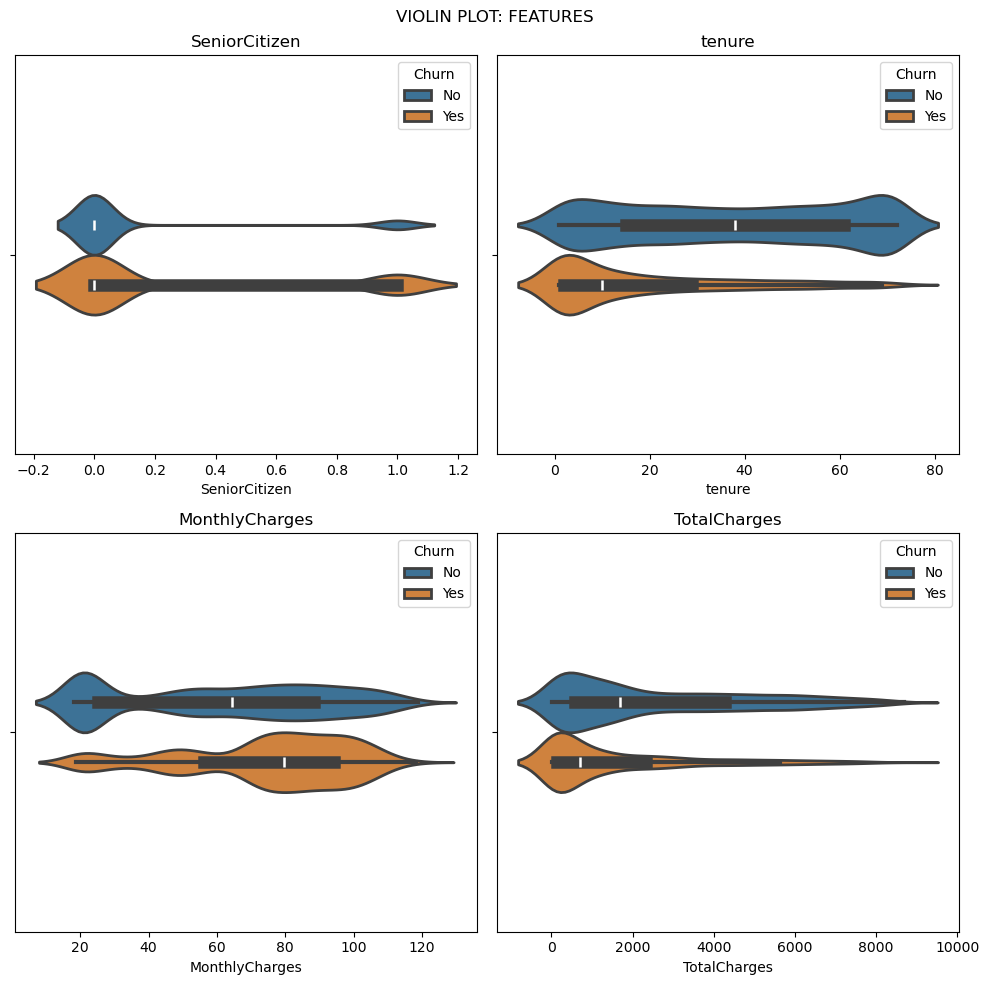

In [1247]:
# violin plot of the numerical features
plt.figure(figsize=(10,10))
plt.suptitle("VIOLIN PLOT: FEATURES")
c = 1
for feature in numerical_features:
    plt.subplot(2,2,c)
    plt.title(feature)
    c += 1
    sns.violinplot(data = df,x=feature,saturation=0.6,fill=True,width=0.3,
                linewidth=2,hue='Churn')
plt.tight_layout()
plt.show()

* Groupby analysis after data transformation

### DATA PREPRATION
1. DATA CLEANING 
2. DATA REDUCTION
3. DATA TRANSFORMATION
4. CORELATION ANALYSIS 
5. GROUP BY ANALYSIS 




#### DATA CLEANING 

In [1248]:
# code for taking the number of categries and categories of each categorica feature 
for feature in categorical_features:
    print(f"{feature}: categories: {df[feature].unique()}    :no of categories: {df[feature].nunique()}")

gender: categories: ['Female' 'Male']    :no of categories: 2
Partner: categories: ['Yes' 'No']    :no of categories: 2
Dependents: categories: ['No' 'Yes']    :no of categories: 2
PhoneService: categories: ['No' 'Yes']    :no of categories: 2
MultipleLines: categories: ['No phone service' 'No' 'Yes']    :no of categories: 3
InternetService: categories: ['DSL' 'Fiber optic' 'No']    :no of categories: 3
OnlineSecurity: categories: ['No' 'Yes' 'No internet service']    :no of categories: 3
OnlineBackup: categories: ['Yes' 'No' 'No internet service']    :no of categories: 3
DeviceProtection: categories: ['No' 'Yes' 'No internet service']    :no of categories: 3
TechSupport: categories: ['No' 'Yes' 'No internet service']    :no of categories: 3
StreamingTV: categories: ['No' 'Yes' 'No internet service']    :no of categories: 3
StreamingMovies: categories: ['No' 'Yes' 'No internet service']    :no of categories: 3
Contract: categories: ['Month-to-month' 'One year' 'Two year']    :no of cat

In [1249]:
df.replace('No internet service',"No",inplace=True)
df.replace("No phone service","No", inplace=True)

#### DATA TRANSFORMATION
* includes encoding the categorical features in to numerical 

In [1250]:
# encoding the caltegorical features using the conmcept of dictionary 
dictionary = {} 

for feature in categorical_features:
    dictionary[feature] = {}
    index = 1
    for value in df[feature]:
        if value not in dictionary[feature]:
            dictionary[feature][value] = index
            index += 1

In [1251]:
# dictionary conatining all the necessory informations 
dictionary

{'gender': {'Female': 1, 'Male': 2},
 'Partner': {'Yes': 1, 'No': 2},
 'Dependents': {'No': 1, 'Yes': 2},
 'PhoneService': {'No': 1, 'Yes': 2},
 'MultipleLines': {'No': 1, 'Yes': 2},
 'InternetService': {'DSL': 1, 'Fiber optic': 2, 'No': 3},
 'OnlineSecurity': {'No': 1, 'Yes': 2},
 'OnlineBackup': {'Yes': 1, 'No': 2},
 'DeviceProtection': {'No': 1, 'Yes': 2},
 'TechSupport': {'No': 1, 'Yes': 2},
 'StreamingTV': {'No': 1, 'Yes': 2},
 'StreamingMovies': {'No': 1, 'Yes': 2},
 'Contract': {'Month-to-month': 1, 'One year': 2, 'Two year': 3},
 'PaperlessBilling': {'Yes': 1, 'No': 2},
 'PaymentMethod': {'Electronic check': 1,
  'Mailed check': 2,
  'Bank transfer (automatic)': 3,
  'Credit card (automatic)': 4},
 'Churn': {'No': 1, 'Yes': 2}}

In [1252]:
# mappping the categorical features 
for feature in categorical_features:
    df[feature] = df[feature].map(dictionary[feature])

#### CORELATION ANALYIS 

In [1253]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.002236,-0.016328,0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,0.011902,-0.004928,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,-0.016957,-0.210550,0.015683,0.008392,0.142996,-0.032160,-0.038576,-0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,-0.156258,-0.093712,0.219874,0.102411,0.150541
Partner,0.001379,-0.016957,1.000000,-0.452269,-0.381912,-0.018397,-0.142561,-0.000513,-0.143346,0.141849,-0.153556,-0.120206,-0.124483,-0.118108,-0.294094,-0.013957,-0.133280,-0.097825,-0.319072,0.149982
Dependents,0.010349,-0.210550,-0.452269,1.000000,0.163386,-0.001078,-0.024307,0.044030,0.080786,-0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,0.110131,0.124002,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,-0.381912,0.163386,1.000000,0.007877,0.332399,-0.029835,0.328297,-0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,-0.004823,0.340939,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,-0.018397,-0.001078,0.007877,1.000000,0.279530,0.387266,-0.091676,0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,-0.016696,-0.003106,0.248033,0.113008,0.011691
MultipleLines,-0.008883,0.142996,-0.142561,-0.024307,0.332399,0.279530,1.000000,0.011346,0.098592,-0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,-0.163746,0.036009,0.490912,0.469042,0.040033
InternetService,-0.002236,-0.032160,-0.000513,0.044030,-0.029835,0.387266,0.011346,1.000000,-0.392174,0.313708,-0.305757,-0.388535,-0.241330,-0.250144,0.099579,0.138166,0.008851,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.016328,-0.038576,-0.143346,0.080786,0.328297,-0.091676,0.098592,-0.392174,1.000000,-0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,0.004051,0.162848,0.296447,0.412619,-0.171270
OnlineBackup,0.013093,-0.066663,0.141849,-0.023639,-0.361138,0.052133,-0.202228,0.313708,-0.283285,1.000000,-0.303058,-0.293705,-0.281601,-0.274523,-0.155262,0.127056,-0.096246,-0.441529,-0.510100,0.082307


In [1254]:
# Extractig features that is having atleast a 0.1 corelation with the target feature 
highly_corelated_features = {}

for feature,value in zip(df.corr()['Churn'].index,df.corr()['Churn']):
    if abs(value) >= 0.1 and feature != "Churn":
        highly_corelated_features[feature] = value

In [1255]:
# Highly corelated features and its corelation
highly_corelated_features

{'SeniorCitizen': 0.1505410534156812,
 'Partner': 0.14998192562005916,
 'Dependents': -0.1631284393882205,
 'tenure': -0.35404935895325024,
 'OnlineSecurity': -0.17126992353349896,
 'TechSupport': -0.16471590834410682,
 'Contract': -0.39614953299365574,
 'PaperlessBilling': -0.1914543210800461,
 'PaymentMethod': -0.2629178426475699,
 'MonthlyCharges': 0.19285821847007906,
 'TotalCharges': -0.19948408356756456}

In [1256]:
# less_imprtant feature extraction

less_imp_features = [feature for feature in df.columns if feature not in list(highly_corelated_features.keys())+['Churn']]
less_imp_features

['customerID',
 'gender',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineBackup',
 'DeviceProtection',
 'StreamingTV',
 'StreamingMovies']

#### DATA REDUCTION 

In [1258]:
# removing the less relevant features 
df.drop(columns=less_imp_features,inplace=True)

In [1259]:
df.shape

(7032, 12)

#### DATA CORELATION ANALYSIS 

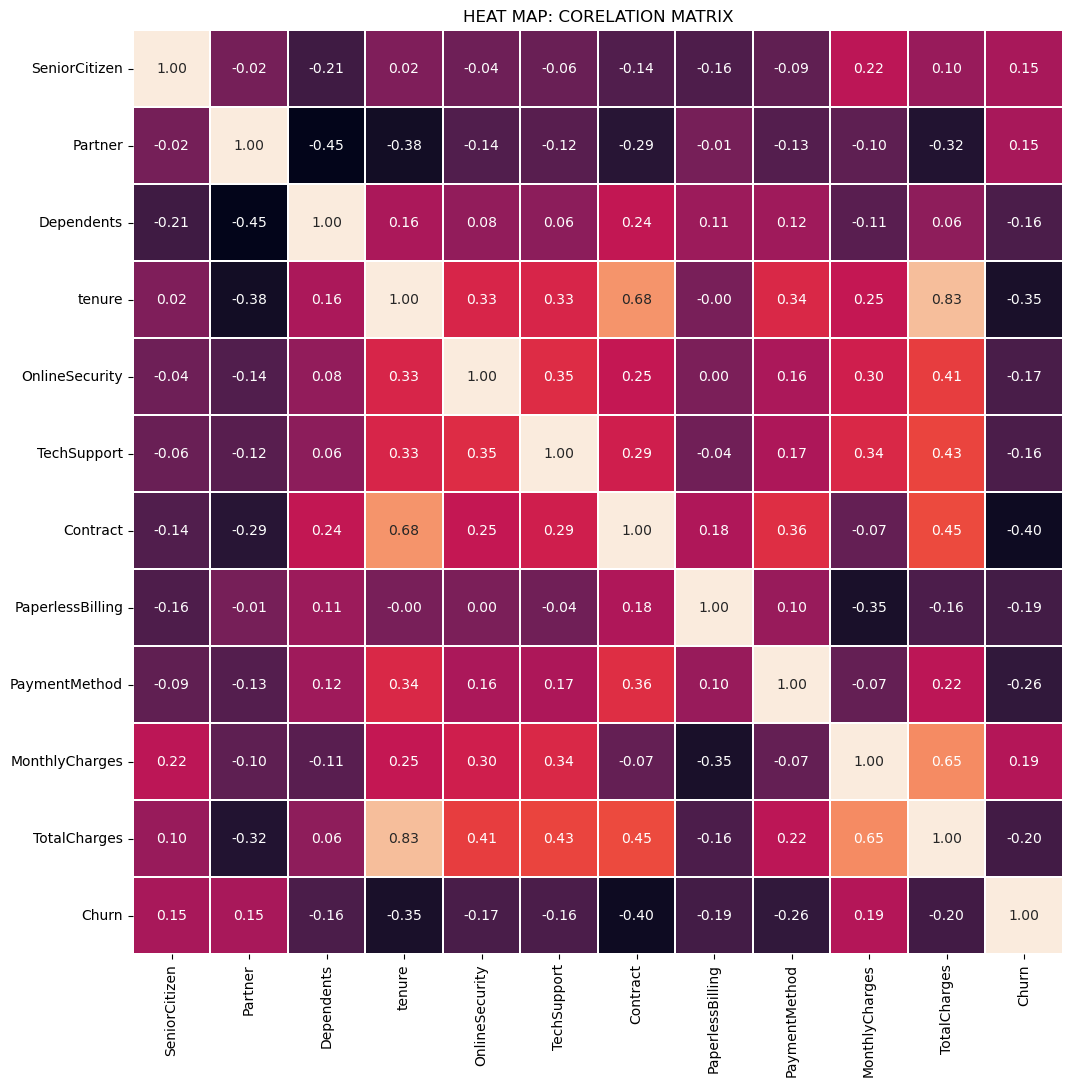

In [1260]:
plt.figure(figsize=(12,12))
plt.title("HEAT MAP: CORELATION MATRIX")
sns.heatmap(df.corr(),annot=True,cbar=False,linewidth=0.2,fmt='0.2f')
plt.show()

In [1261]:
# Corelated features based on the corelation matrix 
corelated_features = ["TotalCharges"]

In [1262]:
# Removing the highly corelated features 
df.drop(columns=corelated_features,inplace=True)

In [1263]:
df.shape

(7032, 11)

#### GROUPBY ANALYSIS 

In [1264]:
df.groupby('Churn').mean()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
Churn,,,,,,,,,,
1,0.128995,1.472400,1.343405,37.650010,1.333140,1.335077,1.887081,1.463878,2.497385,61.307408
2,0.254682,1.642055,1.174425,17.979133,1.157838,1.165864,1.140182,1.250936,1.813269,74.441332


In [1265]:
for feature in [feature for feature in df.columns if feature in categorical_features]:
    print('{}: {}'.format(feature,dictionary[feature]))

Partner: {'Yes': 1, 'No': 2}
Dependents: {'No': 1, 'Yes': 2}
OnlineSecurity: {'No': 1, 'Yes': 2}
TechSupport: {'No': 1, 'Yes': 2}
Contract: {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
PaperlessBilling: {'Yes': 1, 'No': 2}
PaymentMethod: {'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4}
Churn: {'No': 1, 'Yes': 2}


#### MINMAX SCALER TRANSFORMATION FOR MONTHLY CHARGE 

In [1266]:
# applying minmax scaler 
scaler = MinMaxScaler()
df[['MonthlyCharges','tenure']] = scaler.fit_transform(df[['MonthlyCharges','tenure']])

In [1267]:
df['tenure'][:5]

0    0.000000
1    0.464789
2    0.014085
3    0.619718
4    0.014085
Name: tenure, dtype: float64

#### TRAIN TEST SPLIT 

In [1268]:
# splitting thr target feature 

X = df.drop(columns=['Churn'])
y = df['Churn']

In [1280]:
# splitting the dataset for train and test split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.333,random_state=5)

In [1281]:
# checking the shape of the dataset 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4690, 10), (2342, 10), (4690,), (2342,))

#### MODEL TRAINING 

In [1282]:
# Simple neural network

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(10,), activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])


In [1283]:
# Compiling the model 
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [1286]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
132/132 [==============================] - 1s 4ms/step - loss: -152.9055 - accuracy: 0.7439 - val_loss: -174.4392 - val_accuracy: 0.7335
Epoch 2/10
132/132 [==============================] - 0s 3ms/step - loss: -182.6162 - accuracy: 0.7439 - val_loss: -206.4789 - val_accuracy: 0.7335
Epoch 3/10
132/132 [==============================] - 0s 3ms/step - loss: -214.3788 - accuracy: 0.7439 - val_loss: -240.5481 - val_accuracy: 0.7335
Epoch 4/10
132/132 [==============================] - 0s 3ms/step - loss: -248.2273 - accuracy: 0.7439 - val_loss: -276.6892 - val_accuracy: 0.7335
Epoch 5/10
132/132 [==============================] - 0s 3ms/step - loss: -284.1141 - accuracy: 0.7439 - val_loss: -315.1693 - val_accuracy: 0.7335
Epoch 6/10
132/132 [==============================] - 0s 3ms/step - loss: -321.8915 - accuracy: 0.7439 - val_loss: -355.5625 - val_accuracy: 0.7335
Epoch 7/10
132/132 [==============================] - 0s 2ms/step - loss: -361.5657 - accuracy: 0.7439 - val_los